In [1]:
import pandas as pd
import seaborn as sns
sns.set(font_scale = 1.2)
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import time
from sklearn.metrics import classification_report,confusion_matrix,balanced_accuracy_score,log_loss,ConfusionMatrixDisplay,precision_score,f1_score,recall_score

In [2]:
df = pd.read_csv(r'indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.shape

(583, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
df = df.dropna()
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [7]:
df['Gender'].value_counts()

Male      439
Female    140
Name: Gender, dtype: int64

In [8]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Dataset'] = df['Dataset'].map({1:0,2:1})

In [9]:
df['Dataset'].value_counts()

0    414
1    165
Name: Dataset, dtype: int64

In [44]:
df.columns.tolist()

['Age',
 'Gender',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Dataset']

In [11]:
X=df.iloc[:,df.columns !='Dataset']
y=df.iloc[:,df.columns =='Dataset']

In [12]:
from imblearn.over_sampling import RandomOverSampler
smote = RandomOverSampler()
X, y = smote.fit_resample(X, y)

In [13]:
y['Dataset'].value_counts()

0    414
1    414
Name: Dataset, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.20, random_state=101)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
label = sorted(y_train['Dataset'].unique().tolist())
cm_size = (10, 6.5)

In [17]:
label

[0, 1]

Results for Logistic regression:-

********************************************************************************

Training time(sec) =  8.479547023773193
Prediction time(sec) =  0.0


********************************************************************************

Training accuracy =  0.7145015105740181
Testing accuracy =  0.7168674698795181


********************************************************************************

Training log_loss =  0.5625027298671234
Testing log_loss =  0.5560027477046762


********************************************************************************


No of missclassified for class 0 (test data) = 34 
No of missclassified for class 1 (test data) = 13 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  47
Total % of missclassified points (test data) =  28.313253012048197


********************************************************************************


Confusion matrix:


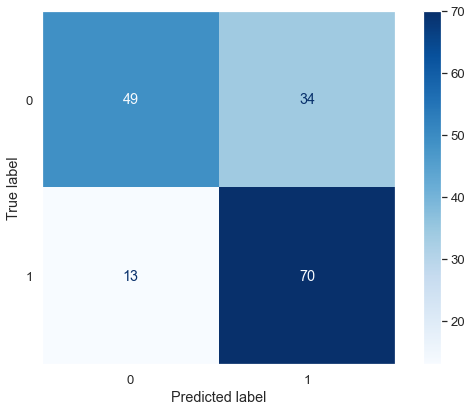



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.79      0.59      0.68        83
           1       0.67      0.84      0.75        83

    accuracy                           0.72       166
   macro avg       0.73      0.72      0.71       166
weighted avg       0.73      0.72      0.71       166



********************************************************************************


In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0, 
                        penalty='l2',           #or 'l1','elasticnet','none'
                        solver='lbfgs',         #or 'newton-cg'
                        multi_class='auto',     #or 'ovr','multinomial'
                        l1_ratio=None,          #or 0 <= l1_ratio <= 1 but only used if penalty='elasticnet'
                        class_weight='balanced', n_jobs=-1)

print('Results for Logistic regression:-\n')
start_time = time.time()
lr.fit(X_train,y_train)
lr_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',lr_time)

y_pred1 = lr.predict(X_train)

start_time = time.time()
y_pred = lr.predict(X_test)
lr_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lr_time2)

try:
    y_pred_prob1 = lr.predict_proba(X_train)
    y_pred_prob = lr.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_lr = confusion_matrix(y_test, y_pred)
lr_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_lr = balanced_accuracy_score(y_train,y_pred1)
acc2_lr = balanced_accuracy_score(y_test,y_pred)
loss1_lr = log_loss(y_train,y_pred_prob1)
loss2_lr = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_lr)
print('Testing accuracy = ',acc2_lr)
print('\n')
print('*'*80)  

print('\nTraining log_loss = ',loss1_lr)
print('Testing log_loss = ',loss2_lr)
print('\n')
print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_lr[i])-cm_lr[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',lr_miss)
print('Total % of missclassified points (test data) = ',(lr_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

LR = [acc1_lr, acc2_lr, lr_miss, lr_miss/len(y_test), lr_time, lr_time2]

Results for Linear support vector classifier:-

********************************************************************************

Training time(sec) =  0.06899666786193848
Prediction time(sec) =  0.0


********************************************************************************

Training accuracy =  0.7175226586102719
Testing accuracy =  0.7228915662650602


********************************************************************************


No of missclassified for class 0 (test data) = 35 
No of missclassified for class 1 (test data) = 11 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  46
Total % of missclassified points (test data) =  27.710843373493976


********************************************************************************


Confusion matrix:


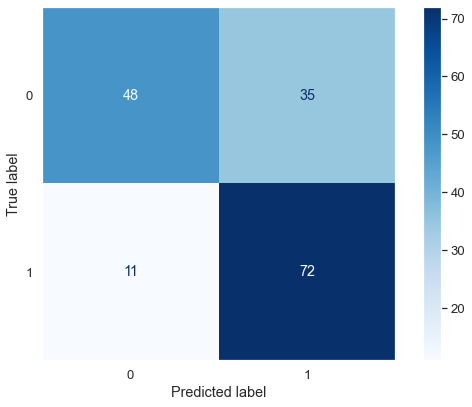



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.81      0.58      0.68        83
           1       0.67      0.87      0.76        83

    accuracy                           0.72       166
   macro avg       0.74      0.72      0.72       166
weighted avg       0.74      0.72      0.72       166



********************************************************************************


In [19]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=1.0, 
                 penalty='l2',            #or 'l1'
                 loss='squared_hinge',    #or 'hinge'
                 class_weight='balanced')

print('Results for Linear support vector classifier:-\n')
start_time = time.time()
lsvc.fit(X_train,y_train)
lsvc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',lsvc_time)

y_pred1 = lsvc.predict(X_train)

start_time = time.time()
y_pred = lsvc.predict(X_test)
lsvc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lsvc_time2)

try:
    y_pred_prob1 = lsvc.predict_proba(X_train)
    y_pred_prob = lsvc.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_lsvc = confusion_matrix(y_test, y_pred)
lsvc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_lsvc = balanced_accuracy_score(y_train,y_pred1)
acc2_lsvc = balanced_accuracy_score(y_test,y_pred)
# loss1_lsvc = log_loss(y_train,y_pred_prob1)
# loss2_lsvc = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_lsvc)
print('Testing accuracy = ',acc2_lsvc)
print('\n')
print('*'*80)  

# print('\nTraining log_loss = ',loss1_lsvc)
# print('Testing log_loss = ',loss2_lsvc)
# print('\n')
# print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_lsvc[i])-cm_lsvc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',lsvc_miss)
print('Total % of missclassified points (test data) = ',(lsvc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

LSVC = [acc1_lsvc, acc2_lsvc, lsvc_miss, lsvc_miss/len(y_test), lsvc_time, lsvc_time2]

Results for Kernal support vector classifier:-

********************************************************************************

Training time(sec) =  0.04500079154968262
Prediction time(sec) =  0.022027015686035156


********************************************************************************

Training accuracy =  0.7356495468277946
Testing accuracy =  0.7349397590361446


********************************************************************************


No of missclassified for class 0 (test data) = 39 
No of missclassified for class 1 (test data) = 5 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  44
Total % of missclassified points (test data) =  26.506024096385545


********************************************************************************


Confusion matrix:


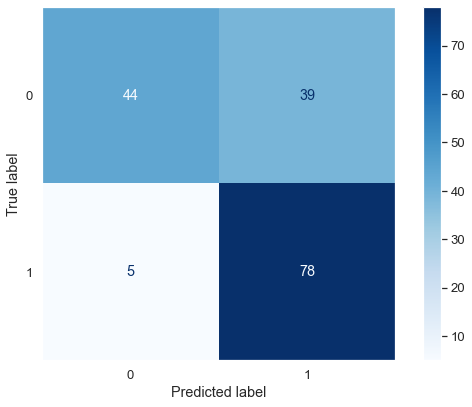



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.90      0.53      0.67        83
           1       0.67      0.94      0.78        83

    accuracy                           0.73       166
   macro avg       0.78      0.73      0.72       166
weighted avg       0.78      0.73      0.72       166



********************************************************************************


In [20]:
from sklearn.svm import SVC
svc = SVC(C=1.0, 
          kernel='rbf',                      #or 'poly'
          degree=3,
          coef0=0.0,                         #Independent term in kernel function, it is only significant in ‘poly’ and ‘sigmoid’.
          gamma='scale',                     #or 0.01,0.1,1.0
          decision_function_shape='ovr',      #or 'ovo'
          class_weight='balanced')

print('Results for Kernal support vector classifier:-\n')
start_time = time.time()
svc.fit(X_train,y_train)
svc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',svc_time)

y_pred1 = svc.predict(X_train)

start_time = time.time()
y_pred = svc.predict(X_test)
svc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',svc_time2)

try:
    y_pred_prob1 = svc.predict_proba(X_train)
    y_pred_prob = svc.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_svc = confusion_matrix(y_test, y_pred)
svc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_svc = balanced_accuracy_score(y_train,y_pred1)
acc2_svc = balanced_accuracy_score(y_test,y_pred)
# loss1_svc = log_loss(y_train,y_pred_prob1)
# loss2_svc = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_svc)
print('Testing accuracy = ',acc2_svc)
print('\n')
print('*'*80)  

# print('\nTraining log_loss = ',loss1_svc)
# print('Testing log_loss = ',loss2_svc)
# print('\n')
# print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_svc[i])-cm_svc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',svc_miss)
print('Total % of missclassified points (test data) = ',(svc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

SVC = [acc1_svc, acc2_svc, svc_miss, svc_miss/len(y_test), svc_time, svc_time2]

Results for K-Neighbors classifier:-

********************************************************************************

Training time(sec) =  0.01098489761352539
Prediction time(sec) =  0.12136530876159668


********************************************************************************

Training accuracy =  0.7960725075528701
Testing accuracy =  0.6807228915662651


********************************************************************************

Training log_loss =  0.37854577280691987
Testing log_loss =  2.1374407334510352


********************************************************************************


No of missclassified for class 0 (test data) = 43 
No of missclassified for class 1 (test data) = 10 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  53
Total % of missclassified points (test data) =  31.92771084337349


********************************************************************************


Confusion m

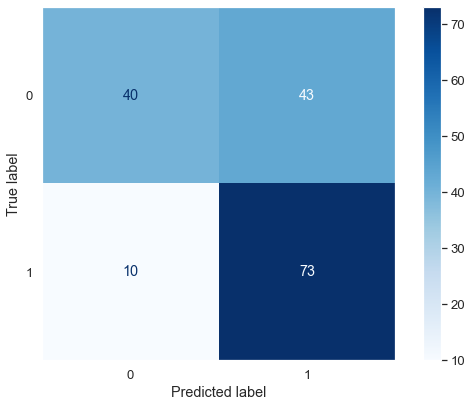



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.80      0.48      0.60        83
           1       0.63      0.88      0.73        83

    accuracy                           0.68       166
   macro avg       0.71      0.68      0.67       166
weighted avg       0.71      0.68      0.67       166



********************************************************************************


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, 
                           weights='uniform', #or 'distance'
                           n_jobs=-1)

print('Results for K-Neighbors classifier:-\n')
start_time = time.time()
knn.fit(X_train,y_train)
knn_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',knn_time)

y_pred1 = knn.predict(X_train)

start_time = time.time()
y_pred = knn.predict(X_test)
knn_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',knn_time2)

try:
    y_pred_prob1 = knn.predict_proba(X_train)
    y_pred_prob = knn.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_knn = confusion_matrix(y_test, y_pred)
knn_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_knn = balanced_accuracy_score(y_train,y_pred1)
acc2_knn = balanced_accuracy_score(y_test,y_pred)
loss1_knn = log_loss(y_train,y_pred_prob1)
loss2_knn = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_knn)
print('Testing accuracy = ',acc2_knn)
print('\n')
print('*'*80)  

print('\nTraining log_loss = ',loss1_knn)
print('Testing log_loss = ',loss2_knn)
print('\n')
print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_knn[i])-cm_knn[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',knn_miss)
print('Total % of missclassified points (test data) = ',(knn_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

KNN = [acc1_knn, acc2_knn, knn_miss, knn_miss/len(y_test), knn_time, knn_time2]

Results for Linear Discriminant classifier:-

********************************************************************************

Training time(sec) =  0.00899648666381836
Prediction time(sec) =  0.0


********************************************************************************

Training accuracy =  0.7054380664652569
Testing accuracy =  0.6987951807228916


********************************************************************************

Training log_loss =  0.5895872876455711
Testing log_loss =  0.5938672979191879


********************************************************************************


No of missclassified for class 0 (test data) = 34 
No of missclassified for class 1 (test data) = 16 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  50
Total % of missclassified points (test data) =  30.120481927710845


********************************************************************************


Confusion matrix:


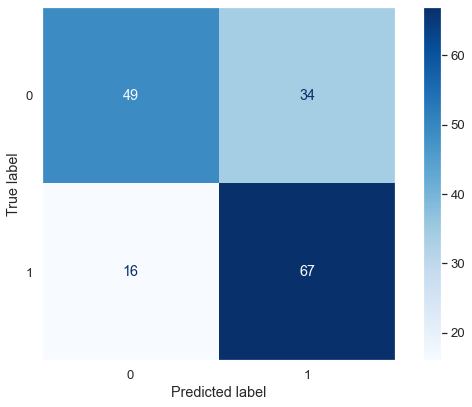



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.75      0.59      0.66        83
           1       0.66      0.81      0.73        83

    accuracy                           0.70       166
   macro avg       0.71      0.70      0.70       166
weighted avg       0.71      0.70      0.70       166



********************************************************************************


In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(priors = [0.5,0.5], n_components=None) #or priors = [1,1]

print('Results for Linear Discriminant classifier:-\n')
start_time = time.time()
lda.fit(X_train,y_train)
lda_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',lda_time)

y_pred1 = lda.predict(X_train)

start_time = time.time()
y_pred = lda.predict(X_test)
lda_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lda_time2)

try:
    y_pred_prob1 = lda.predict_proba(X_train)
    y_pred_prob = lda.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_lda = confusion_matrix(y_test, y_pred)
lda_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_lda = balanced_accuracy_score(y_train,y_pred1)
acc2_lda = balanced_accuracy_score(y_test,y_pred)
loss1_lda = log_loss(y_train,y_pred_prob1)
loss2_lda = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_lda)
print('Testing accuracy = ',acc2_lda)
print('\n')
print('*'*80)  

print('\nTraining log_loss = ',loss1_lda)
print('Testing log_loss = ',loss2_lda)
print('\n')
print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_lda[i])-cm_lda[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',lda_miss)
print('Total % of missclassified points (test data) = ',(lda_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

LDA = [acc1_lda, acc2_lda, lda_miss, lda_miss/len(y_test), lda_time, lda_time2]

Results for Quadratic Discriminant classifier:-

********************************************************************************

Training time(sec) =  0.024996519088745117
Prediction time(sec) =  0.002028226852416992


********************************************************************************

Training accuracy =  0.6722054380664653
Testing accuracy =  0.6506024096385542


********************************************************************************

Training log_loss =  2.843975188574649
Testing log_loss =  2.9327822953179616


********************************************************************************


No of missclassified for class 0 (test data) = 54 
No of missclassified for class 1 (test data) = 4 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  58
Total % of missclassified points (test data) =  34.93975903614458


********************************************************************************


C

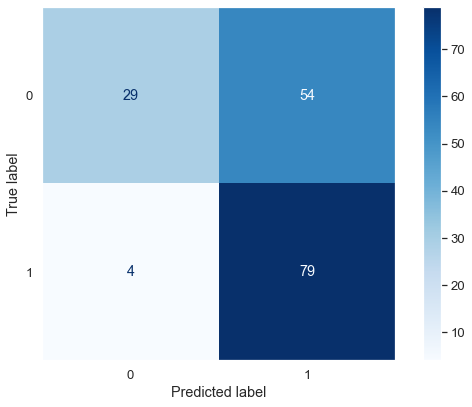



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.88      0.35      0.50        83
           1       0.59      0.95      0.73        83

    accuracy                           0.65       166
   macro avg       0.74      0.65      0.62       166
weighted avg       0.74      0.65      0.62       166



********************************************************************************


In [23]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(priors = [0.5,0.5], reg_param=0.0) #or priors = [1,1]

print('Results for Quadratic Discriminant classifier:-\n')
start_time = time.time()
qda.fit(X_train,y_train)
qda_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',qda_time)

y_pred1 = qda.predict(X_train)

start_time = time.time()
y_pred = qda.predict(X_test)
qda_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',qda_time2)

try:
    y_pred_prob1 = qda.predict_proba(X_train)
    y_pred_prob = qda.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_qda = confusion_matrix(y_test, y_pred)
qda_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_qda = balanced_accuracy_score(y_train,y_pred1)
acc2_qda = balanced_accuracy_score(y_test,y_pred)
loss1_qda = log_loss(y_train,y_pred_prob1)
loss2_qda = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_qda)
print('Testing accuracy = ',acc2_qda)
print('\n')
print('*'*80)  

print('\nTraining log_loss = ',loss1_qda)
print('Testing log_loss = ',loss2_qda)
print('\n')
print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_qda[i])-cm_qda[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',qda_miss)
print('Total % of missclassified points (test data) = ',(qda_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

QDA = [acc1_qda, acc2_qda, qda_miss, qda_miss/len(y_test), qda_time, qda_time2]

Results for Decision Tree classifier:-

********************************************************************************

Training time(sec) =  0.01900458335876465
Prediction time(sec) =  0.0010089874267578125


********************************************************************************

Training accuracy =  1.0
Testing accuracy =  0.8674698795180722


********************************************************************************

Training log_loss =  9.992007221626413e-16
Testing log_loss =  4.577428196915874


********************************************************************************


No of missclassified for class 0 (test data) = 18 
No of missclassified for class 1 (test data) = 4 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  22
Total % of missclassified points (test data) =  13.253012048192772


********************************************************************************


Confusion matrix:


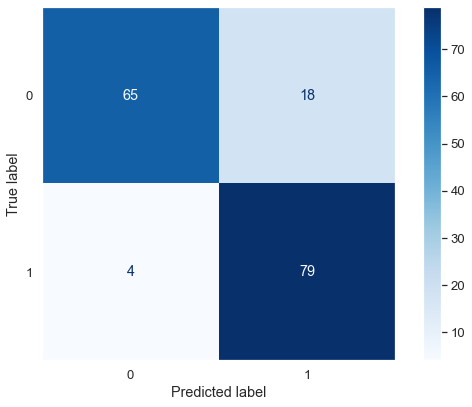



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.94      0.78      0.86        83
           1       0.81      0.95      0.88        83

    accuracy                           0.87       166
   macro avg       0.88      0.87      0.87       166
weighted avg       0.88      0.87      0.87       166



********************************************************************************


In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',          #or 'entropy'
                             splitter='best',           #or 'random'
                             max_depth=None,            #or 10,15,20
                             max_features=None,         #or 0.5,0.6,0.7,0.8
                             class_weight='balanced') 

print('Results for Decision Tree classifier:-\n')
start_time = time.time()
dtc.fit(X_train,y_train)
dtc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',dtc_time)

y_pred1 = dtc.predict(X_train)

start_time = time.time()
y_pred = dtc.predict(X_test)
dtc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',dtc_time2)

try:
    y_pred_prob1 = dtc.predict_proba(X_train)
    y_pred_prob = dtc.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_dtc = confusion_matrix(y_test, y_pred)
dtc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_dtc = balanced_accuracy_score(y_train,y_pred1)
acc2_dtc = balanced_accuracy_score(y_test,y_pred)
loss1_dtc = log_loss(y_train,y_pred_prob1)
loss2_dtc = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_dtc)
print('Testing accuracy = ',acc2_dtc)
print('\n')
print('*'*80)  

print('\nTraining log_loss = ',loss1_dtc)
print('Testing log_loss = ',loss2_dtc)
print('\n')
print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_dtc[i])-cm_dtc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',dtc_miss)
print('Total % of missclassified points (test data) = ',(dtc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

DTC = [acc1_dtc, acc2_dtc, dtc_miss, dtc_miss/len(y_test), dtc_time, dtc_time2]

Results for Extra Tree classifier:-

********************************************************************************

Training time(sec) =  0.019997835159301758
Prediction time(sec) =  0.0009963512420654297


********************************************************************************

Training accuracy =  1.0
Testing accuracy =  0.8734939759036144


********************************************************************************

Training log_loss =  9.992007221626413e-16
Testing log_loss =  4.369363278874244


********************************************************************************


No of missclassified for class 0 (test data) = 18 
No of missclassified for class 1 (test data) = 3 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  21
Total % of missclassified points (test data) =  12.650602409638553


********************************************************************************


Confusion matrix:


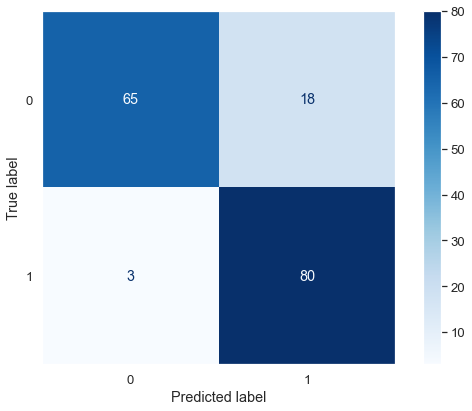



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        83
           1       0.82      0.96      0.88        83

    accuracy                           0.87       166
   macro avg       0.89      0.87      0.87       166
weighted avg       0.89      0.87      0.87       166



********************************************************************************


In [25]:
from sklearn.tree import ExtraTreeClassifier
etc = ExtraTreeClassifier(criterion='gini',          #or 'entropy'
                            splitter='best',           #or 'random'
                            max_depth=None,            #or 10,15,20
                            max_features=None,         #or 0.5,0.6,0.7,0.8
                            class_weight='balanced') 

print('Results for Extra Tree classifier:-\n')
start_time = time.time()
etc.fit(X_train,y_train)
etc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',etc_time)

y_pred1 = etc.predict(X_train)

start_time = time.time()
y_pred = etc.predict(X_test)
etc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',etc_time2)

try:
    y_pred_prob1 = etc.predict_proba(X_train)
    y_pred_prob = etc.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_etc = confusion_matrix(y_test, y_pred)
etc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_etc = balanced_accuracy_score(y_train,y_pred1)
acc2_etc = balanced_accuracy_score(y_test,y_pred)
loss1_etc = log_loss(y_train,y_pred_prob1)
loss2_etc = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_etc)
print('Testing accuracy = ',acc2_etc)
print('\n')
print('*'*80)  

print('\nTraining log_loss = ',loss1_etc)
print('Testing log_loss = ',loss2_etc)
print('\n')
print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_etc[i])-cm_etc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',etc_miss)
print('Total % of missclassified points (test data) = ',(etc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

ETC = [acc1_etc, acc2_etc, etc_miss, etc_miss/len(y_test), etc_time, etc_time2]

Results for Random Forest classifier:-

********************************************************************************

Training time(sec) =  0.5536446571350098
Prediction time(sec) =  0.10891842842102051


********************************************************************************

Training accuracy =  1.0
Testing accuracy =  0.8192771084337349


********************************************************************************

Training log_loss =  0.0933454521549284
Testing log_loss =  0.3056976482310895


********************************************************************************


No of missclassified for class 0 (test data) = 24 
No of missclassified for class 1 (test data) = 6 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  30
Total % of missclassified points (test data) =  18.072289156626507


********************************************************************************


Confusion matrix:


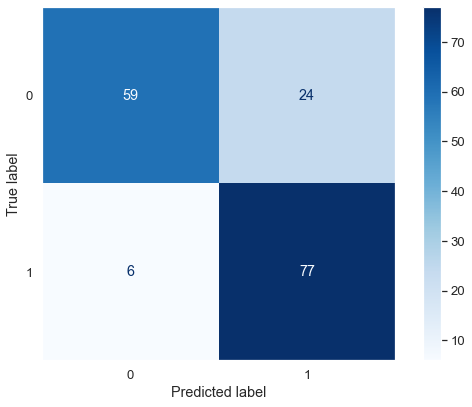



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        83
           1       0.76      0.93      0.84        83

    accuracy                           0.82       166
   macro avg       0.84      0.82      0.82       166
weighted avg       0.84      0.82      0.82       166



********************************************************************************


In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,
                             bootstrap=True,
                             criterion='gini',          #or 'entropy'
                             max_depth=None,            #or 10,15,20
                             max_features=None,         #or 0.5,0.6,0.7,0.8
                             max_samples=None,          #or 0.5,0.6,0.7,0.8
                             class_weight='balanced',
                             n_jobs=-1) 

print('Results for Random Forest classifier:-\n')
start_time = time.time()
rfc.fit(X_train,y_train)
rfc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',rfc_time)

y_pred1 = rfc.predict(X_train)

start_time = time.time()
y_pred = rfc.predict(X_test)
rfc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',rfc_time2)

try:
    y_pred_prob1 = rfc.predict_proba(X_train)
    y_pred_prob = rfc.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_rfc = confusion_matrix(y_test, y_pred)
rfc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_rfc = balanced_accuracy_score(y_train,y_pred1)
acc2_rfc = balanced_accuracy_score(y_test,y_pred)
loss1_rfc = log_loss(y_train,y_pred_prob1)
loss2_rfc = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_rfc)
print('Testing accuracy = ',acc2_rfc)
print('\n')
print('*'*80)  

print('\nTraining log_loss = ',loss1_rfc)
print('Testing log_loss = ',loss2_rfc)
print('\n')
print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_rfc[i])-cm_rfc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',rfc_miss)
print('Total % of missclassified points (test data) = ',(rfc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

RFC = [acc1_rfc, acc2_rfc, rfc_miss, rfc_miss/len(y_test), rfc_time, rfc_time2]

Results for Extra Trees classifier:-

********************************************************************************

Training time(sec) =  0.4451904296875
Prediction time(sec) =  0.11111283302307129


********************************************************************************

Training accuracy =  1.0
Testing accuracy =  0.8674698795180723


********************************************************************************

Training log_loss =  0.09184891986959362
Testing log_loss =  0.2779868200022419


********************************************************************************


No of missclassified for class 0 (test data) = 16 
No of missclassified for class 1 (test data) = 6 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  22
Total % of missclassified points (test data) =  13.253012048192772


********************************************************************************


Confusion matrix:


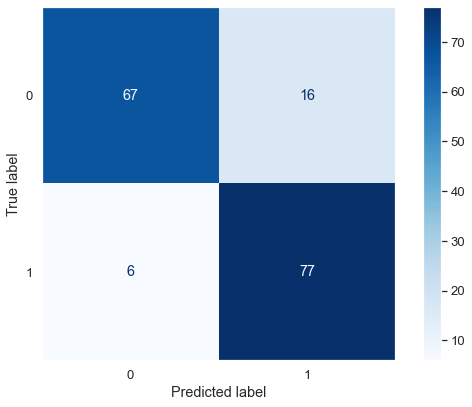



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        83
           1       0.83      0.93      0.87        83

    accuracy                           0.87       166
   macro avg       0.87      0.87      0.87       166
weighted avg       0.87      0.87      0.87       166



********************************************************************************


In [27]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=100,
                            bootstrap=True,
                            criterion='gini',          #or 'entropy'
                            max_depth=None,            #or 10,15,20
                            max_features=None,         #or 0.5,0.6,0.7,0.8
                            max_samples=None,          #or 0.5,0.6,0.7,0.8
                            class_weight='balanced',
                            n_jobs=-1) 

print('Results for Extra Trees classifier:-\n')
start_time = time.time()
et.fit(X_train,y_train)
et_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',et_time)

y_pred1 = et.predict(X_train)

start_time = time.time()
y_pred = et.predict(X_test)
et_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',et_time2)

try:
    y_pred_prob1 = et.predict_proba(X_train)
    y_pred_prob = et.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_et = confusion_matrix(y_test, y_pred)
et_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_et = balanced_accuracy_score(y_train,y_pred1)
acc2_et = balanced_accuracy_score(y_test,y_pred)
loss1_et = log_loss(y_train,y_pred_prob1)
loss2_et = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_et)
print('Testing accuracy = ',acc2_et)
print('\n')
print('*'*80)  

print('\nTraining log_loss = ',loss1_et)
print('Testing log_loss = ',loss2_et)
print('\n')
print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_et[i])-cm_et[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',et_miss)
print('Total % of missclassified points (test data) = ',(et_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

ET = [acc1_et, acc2_et, et_miss, et_miss/len(y_test), et_time, et_time2]

Results for Voting classifier:-

********************************************************************************

Training time(sec) =  4.847527980804443
Prediction time(sec) =  0.11026144027709961


********************************************************************************

Training accuracy =  1.0
Testing accuracy =  0.8734939759036144


********************************************************************************


No of missclassified for class 0 (test data) = 18 
No of missclassified for class 1 (test data) = 3 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  21
Total % of missclassified points (test data) =  12.650602409638553


********************************************************************************


Confusion matrix:


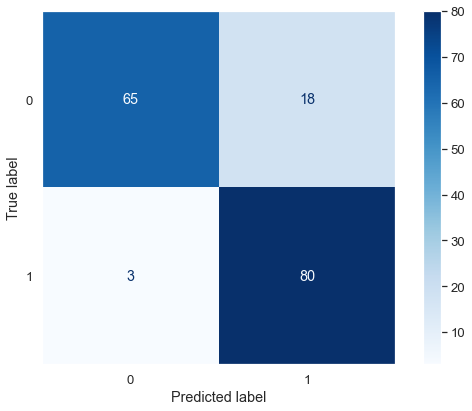



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        83
           1       0.82      0.96      0.88        83

    accuracy                           0.87       166
   macro avg       0.89      0.87      0.87       166
weighted avg       0.89      0.87      0.87       166



********************************************************************************


In [34]:
from sklearn.ensemble import VotingClassifier
vtc = VotingClassifier(estimators=[('etc', etc), ('et', et)],
                        voting='soft',             #soft takes probability score
                        weights=None,              #weights for each classifier
                        n_jobs=-1) 

print('Results for Voting classifier:-\n')
start_time = time.time()
vtc.fit(X_train,y_train)
vtc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',vtc_time)

y_pred1 = vtc.predict(X_train)

start_time = time.time()
y_pred = vtc.predict(X_test)
vtc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',vtc_time2)

try:
    y_pred_prob1 = vtc.predict_proba(X_train)
    y_pred_prob = vtc.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_vtc = confusion_matrix(y_test, y_pred)
vtc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_vtc = balanced_accuracy_score(y_train,y_pred1)
acc2_vtc = balanced_accuracy_score(y_test,y_pred)
# loss1_vtc = log_loss(y_train,y_pred_prob1)
# loss2_vtc = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_vtc)
print('Testing accuracy = ',acc2_vtc)
print('\n')
print('*'*80)  

# print('\nTraining log_loss = ',loss1_vtc)
# print('Testing log_loss = ',loss2_vtc)
# print('\n')
# print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_vtc[i])-cm_vtc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',vtc_miss)
print('Total % of missclassified points (test data) = ',(vtc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 

VTC = [acc1_vtc, acc2_vtc, vtc_miss, vtc_miss/len(y_test), vtc_time, vtc_time2]

Results for Stacking classifier:-

********************************************************************************

Training time(sec) =  3.169696092605591
Prediction time(sec) =  0.23633193969726562


********************************************************************************

Training accuracy =  1.0
Testing accuracy =  0.8975903614457832


********************************************************************************

Training log_loss =  0.14024002114518563
Testing log_loss =  0.3303529085832818


********************************************************************************


No of missclassified for class 0 (test data) = 11 
No of missclassified for class 1 (test data) = 6 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  17
Total % of missclassified points (test data) =  10.240963855421686


********************************************************************************


Confusion matrix:


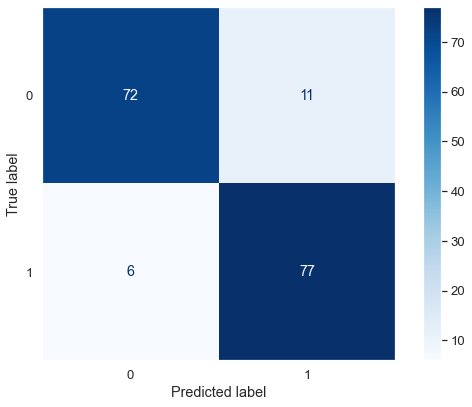



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        83
           1       0.88      0.93      0.90        83

    accuracy                           0.90       166
   macro avg       0.90      0.90      0.90       166
weighted avg       0.90      0.90      0.90       166



********************************************************************************


In [38]:
from sklearn.ensemble import StackingClassifier
stc = StackingClassifier(estimators=[('etc', etc), ('et', et)],
                         final_estimator=VotingClassifier(estimators=[('etc', etc), ('et', et)],
                        voting='soft',             #soft takes probability score
                        weights=None,              #weights for each classifier
                        n_jobs=-1),
                         cv=None,
                         stack_method='predict',   #or 'predict_proba'
                         passthrough=False, #When True the final_estimator is trained on the predictions as well as the original training data.
                         n_jobs=-1) 

print('Results for Stacking classifier:-\n')
start_time = time.time()
stc.fit(X_train,y_train)
stc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',stc_time)

y_pred1 = stc.predict(X_train)

start_time = time.time()
y_pred = stc.predict(X_test)
stc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',stc_time2)

try:
    y_pred_prob1 = stc.predict_proba(X_train)
    y_pred_prob = stc.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_stc = confusion_matrix(y_test, y_pred)
stc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_stc = balanced_accuracy_score(y_train,y_pred1)
acc2_stc = balanced_accuracy_score(y_test,y_pred)
loss1_stc = log_loss(y_train,y_pred_prob1)
loss2_stc = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining accuracy = ',acc1_stc)
print('Testing accuracy = ',acc2_stc)
print('\n')
print('*'*80)  

print('\nTraining log_loss = ',loss1_stc)
print('Testing log_loss = ',loss2_stc)
print('\n')
print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_stc[i])-cm_stc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',stc_miss)
print('Total % of missclassified points (test data) = ',(stc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
fig, ax = plt.subplots(figsize=cm_size)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label, cmap=plt.cm.Blues, ax=ax) #normalize='pred'
plt.grid(False)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred,target_names=[str(i) for i in label]))
print('\n')
print('*'*80) 


STC = [acc1_stc, acc2_stc, stc_miss, stc_miss/len(y_test), stc_time, stc_time2]

In [39]:
s1=[LR,LDA,QDA,LSVC,SVC,KNN,DTC,ETC,RFC,ET,VTC,STC]
s2=['LR','LDA','QDA','LSVC','SVC','KNN','DTC','ETC','RFC','ET','VTC','STC']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result['% of Missclasification'] *= 100

In [40]:
result

,Classifiers,Train score,Test score,No of Missclassification,% of Missclasification,Training time,Prediction time
0,LR,0.714502,0.716867,47,28.313253,8.479547,0.000000
1,LDA,0.705438,0.698795,50,30.120482,0.008996,0.000000
2,QDA,0.672205,0.650602,58,34.939759,0.024997,0.002028
3,LSVC,0.717523,0.722892,46,27.710843,0.068997,0.000000
4,SVC,0.735650,0.734940,44,26.506024,0.045001,0.022027
5,KNN,0.796073,0.680723,53,31.927711,0.010985,0.121365
6,DTC,1.000000,0.867470,22,13.253012,0.019005,0.001009
7,ETC,1.000000,0.873494,21,12.650602,0.019998,0.000996
8,RFC,1.000000,0.819277,30,18.072289,0.553645,0.108918
9,ET,1.000000,0.867470,22,13.253012,0.445190,0.111113


In [45]:
import joblib

joblib.dump(stc, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']